In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras 
import tensorflow.keras.layers as k


## DATA

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


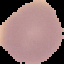

In [3]:
#target_size for getting the image of same size maintain uniformity
load_img("C:\\Users\\ASUS\\Desktop\\ml geeks\\malaria  cell detection using cnn\\archive (2)\\Malarial Cell Image Data\\cell_images\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_9.png",target_size=(64,64))

In [4]:
np.random.seed(312)

In [5]:
image_dir='C:\\Users\\ASUS\\Desktop\\ml geeks\\malaria  cell detection using cnn\\archive (2)\\Malarial Cell Image Data\\cell_images'

In [6]:
size=64
dataset=[]
label=[]

In [7]:
parasitized_img=os.listdir(image_dir+'\\Parasitized')

In [8]:
for i ,img_name in enumerate(parasitized_img):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'\\Parasitized\\'+img_name)# converts the image to 3d numpy array
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        dataset.append(np.array(image))
        label.append(0) #apppend 0 because all the parasitized are labeled 0
        

In [9]:
Uninfected_img=os.listdir(image_dir+'\\Uninfected')
for i ,img_name in enumerate(Uninfected_img):
    if(img_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'\\Uninfected\\'+img_name)# converts the image to 3d numpy array
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        dataset.append(np.array(image))
        label.append(1) #apppend 1 because all the Uninfected_ are labeled 1
        

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)

# CNN MODEL Architecture

In [13]:
INPUT_SHAPE=(size,size,3)
inp=k.Input(shape=INPUT_SHAPE)

conv1=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)


conv2=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)


flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation="relu")(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256,activation="relu")(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)


out=k.Dense(2,activation="sigmoid")(drop4)




In [17]:
model=keras.Model(inputs=inp,outputs=out)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [18]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [21]:
history=model.fit(np.array(xtrain),ytrain,batch_size=64,verbose=1,epochs=15,validation_split=0.1)

Epoch 1/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.9528 - loss: 0.1253 - val_accuracy: 0.9296 - val_loss: 0.1766
Epoch 2/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.9563 - loss: 0.1090 - val_accuracy: 0.8871 - val_loss: 0.3272
Epoch 3/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.9612 - loss: 0.1011 - val_accuracy: 0.9380 - val_loss: 0.1502
Epoch 4/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.9662 - loss: 0.0892 - val_accuracy: 0.9429 - val_loss: 0.1525
Epoch 5/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.9703 - loss: 0.0794 - val_accuracy: 0.9449 - val_loss: 0.1453
Epoch 6/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.9727 - loss: 0.0712 - val_accuracy: 0.9345 - val_loss: 0.1627
Epoch 7/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.9794 - loss: 0.0604 - val_accuracy: 0.9380 - val_loss: 0.1823
Epoch 8/15
202/202 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9764 - loss: 0

In [22]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9550 - loss: 0.1774
Test_Accuracy: 95.29%
